# Problem 1

## Problem Description
In this problem you will create your own neural network to fit a function with two input features $x_0$ and $x_1$, and predict the output, $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an MSE for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model MSE
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [401]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

def dataGen():
    # Set random seed so generated random numbers are always the same
    gen = np.random.RandomState(0)
    # Generate x0 and x1
    x = 2*(gen.rand(200,2)-0.5)
    # Generate y with x0^2 - 0.2*x1^4 + x0*x1 + noise
    y = x[:,0]**2 - 0.2*x[:,1]**4 + x[:,0]*x[:,1] + 0.4*(gen.rand(len(x))-0.5)
    
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 25
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]),max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]),max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = model(Xgrid).reshape(n,n)
    # 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot data
    ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
    # Plot model
    ax.plot_surface(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(), color = 'gray', alpha = 0.25)
    ax.plot_wireframe(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(),color = 'black', alpha = 0.25)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 3D scatter plot.

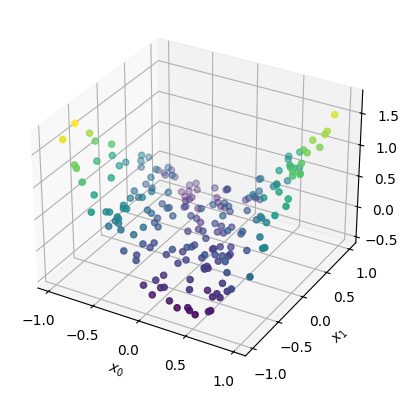

In [402]:
# YOUR CODE GOES HERE
# generate data
x, y = dataGen()

# plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, c=y, cmap='viridis')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$y$')
plt.show()

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An MSE smaller than 0.02 is reasonable. 

In [403]:
# YOUR CODE GOES HERE
# import utility fucntions
from torch import optim, nn 
import torch.nn.functional as F

# covert data to tensor
x = torch.Tensor(x)
y = torch.Tensor(y).reshape(-1,1)

# define model
class Net_3_layer(nn.Module):
    def __init__(self, N_hidden=5, N_in=2, N_out=1, activation = F.relu):
        super().__init__()
        self.lin1 = nn.Linear(N_in, N_hidden)
        self.lin2 = nn.Linear(N_hidden, N_hidden)
        self.lin3 = nn.Linear(N_hidden, N_hidden)
        self.lin4 = nn.Linear(N_hidden, N_out)
        self.act = activation

        # other activation functions
        if activation == F.relu:
            self.act = nn.ReLU()
        elif activation == F.sigmoid:
            self.act = nn.Sigmoid()
        elif activation == F.tanh:
            self.act = nn.Tanh()
        elif activation == F.leaky_relu:
            self.act = nn.LeakyReLU()
        elif activation == F.gelu:
            self.act = nn.GELU()
        else:
            self.act = nn.Identity()

    def forward(self,x):
        x = self.lin1(x)
        x = self.act(x)  # Activation of first hidden layer
        x = self.lin2(x)
        x = self.act(x)  # Activation at second hidden layer
        x = self.lin3(x)
        x = self.act(x)  # Activation at third hidden layer
        x = self.lin4(x) # (No activation at last layer)

        return x

# instantiate model
# ReLU
# model = Net_3_layer(N_hidden=30, N_in=2, N_out=1, activation=F.relu)
# Sigmoid
# model = Net_3_layer(N_hidden=30, N_in=2, N_out=1, activation=F.sigmoid)
# Tanh
# model = Net_3_layer(N_hidden=30, N_in=2, N_out=1, activation=F.tanh)
# Leaky ReLU
model = Net_3_layer(N_hidden=5, N_in=2, N_out=1, activation=F.leaky_relu)
# GELU
# model = Net_3_layer(N_hidden=30, N_in=2, N_out=1, activation=F.gelu)

# lose curve list
loss_curve = []

# train model
# lr = 0.0005     # learning rate
# lr = 0.00005
lr = 0.005
epochs = 1500   # number of epochs
loss_fcn = F.mse_loss

# Set up optimizer to optimize the model's parameters using Adam with the selected learning rate
opt = optim.Adam(params = model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    out = model(x) # Evaluate the model
    loss = loss_fcn(out,y) # Calculate the loss -- error between network prediction and y

    loss_curve.append(loss.item())

    # Print loss progress info 25 times during training
    if epoch % int(epochs / 25) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()}")

    # Move the model parameters 1 step closer to their optima:
    opt.zero_grad()
    loss.backward()
    opt.step()

Epoch 0 of 1500... 	Average loss: 0.26397496461868286
Epoch 60 of 1500... 	Average loss: 0.12510962784290314
Epoch 120 of 1500... 	Average loss: 0.020606068894267082
Epoch 180 of 1500... 	Average loss: 0.017011607065796852
Epoch 240 of 1500... 	Average loss: 0.015141118317842484
Epoch 300 of 1500... 	Average loss: 0.013714760541915894
Epoch 360 of 1500... 	Average loss: 0.012585285119712353
Epoch 420 of 1500... 	Average loss: 0.012331795878708363
Epoch 480 of 1500... 	Average loss: 0.012156221084296703
Epoch 540 of 1500... 	Average loss: 0.01196255162358284
Epoch 600 of 1500... 	Average loss: 0.01173623837530613
Epoch 660 of 1500... 	Average loss: 0.011054372414946556
Epoch 720 of 1500... 	Average loss: 0.010915595106780529
Epoch 780 of 1500... 	Average loss: 0.010857533663511276
Epoch 840 of 1500... 	Average loss: 0.010802366770803928
Epoch 900 of 1500... 	Average loss: 0.010755450464785099
Epoch 960 of 1500... 	Average loss: 0.010601027868688107
Epoch 1020 of 1500... 	Average loss: 0

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

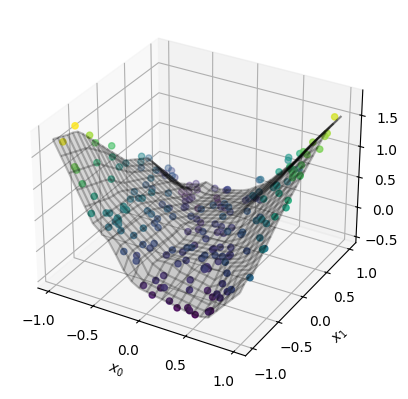

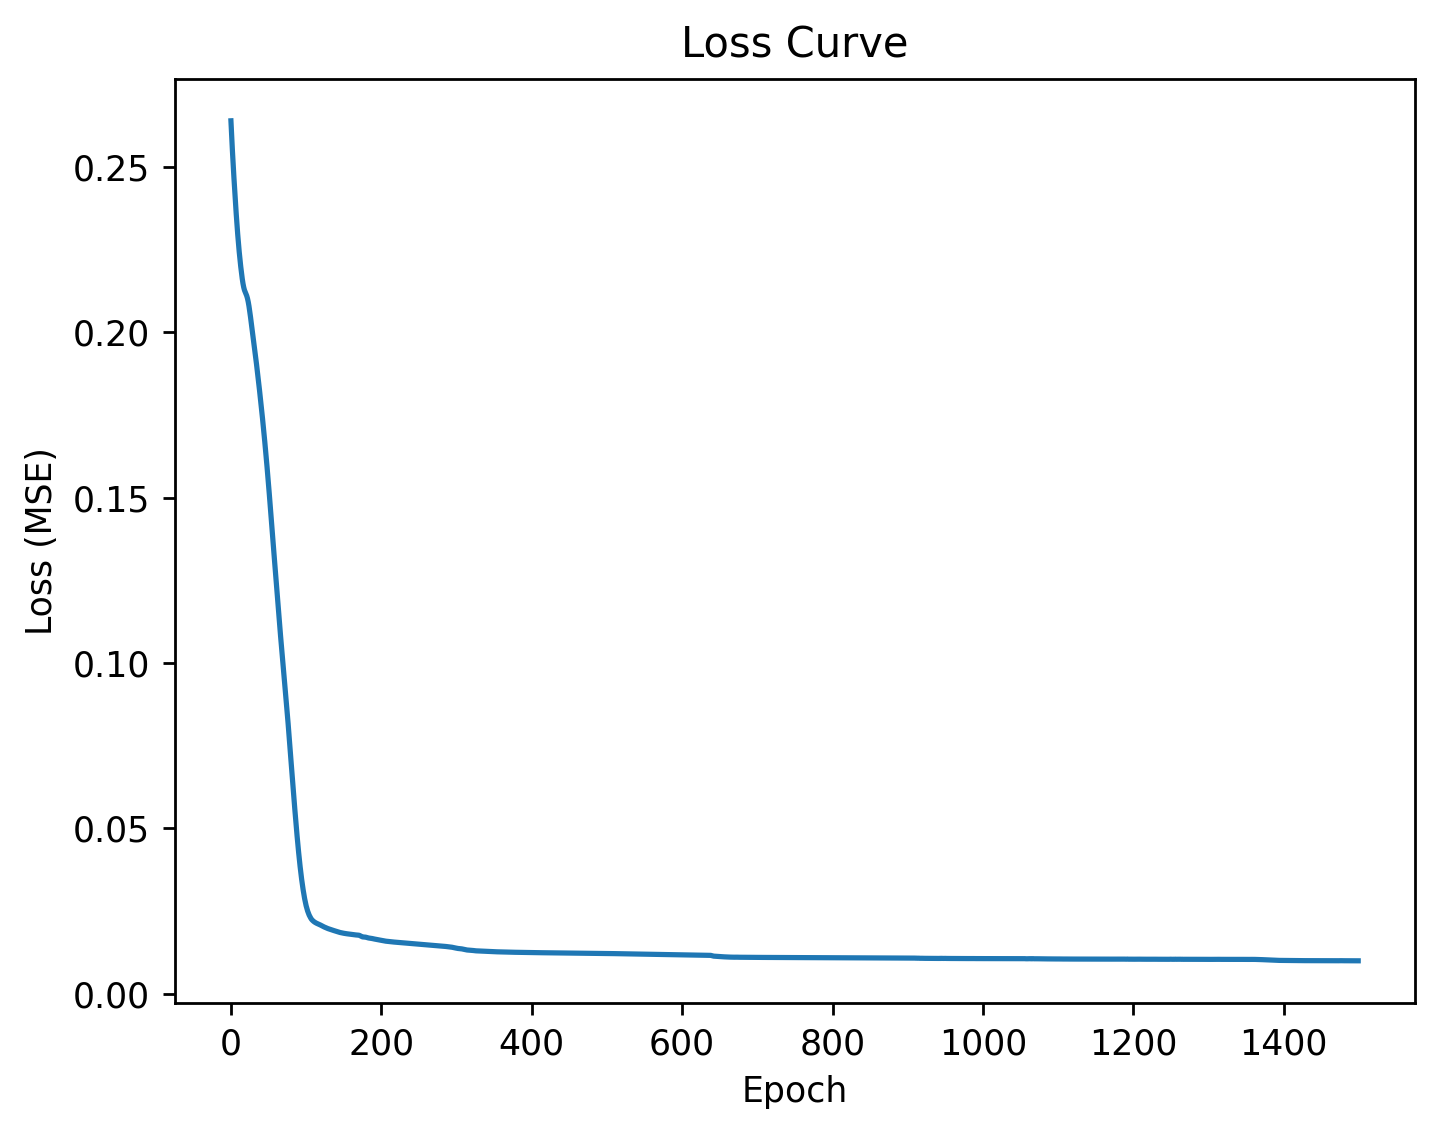

In [404]:
# YOUR CODE GOES HERE
# visualize model
visualizeModel(model)

# plot loss curve
plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

## Discussion
Report the MSE of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

*YOUR ANSWER GOES HERE*


Model structure and parameters:

    3 hidden layers with 5 neurons per hidden layer, Leaky Relu as activation function, Mean Squared Error (MSE) as loss function, optimized using the Adam optimizer with a learning rate of 0.005 for 1500 training epochs. 

Model performance: 

    The MSE of my trained model on the generated data is around 0.0099.

Model design reasoning and parameter experiments:
    
    The model's activation function and learning rate were determined by trial and error. Several activation functions like ReLu, Sigmoid, Tanh, GELU, and Leaky ReLu were explored, and the Leaky ReLu results in the lowest MSE. I also experimented with varying learning rates to determine the model outcome. The results showed that a smaller learning rate converged faster with a lower MSE in our use case. I also test the number of neurons in each hidden layer. The results appeared to be overfitting the data with a larger number of neurons. Other parameters were referred from M7-L2-P2.